In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import cv2
import ffmpeg
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [5]:
local = os.getcwd()
path_aei = local + '/aei/aei*'
path_Carti = local + '/Output_file/Outin*'
path_Count = local + '/aeCount/aeCount*'
filenames_aei = sorted(glob.glob(path_aei))
filenames_Carti = sorted(glob.glob(path_Carti))
filenames_Count = sorted(glob.glob(path_Count))
len(filenames_aei), len(filenames_Carti), len(filenames_Count)

(12, 13, 13)

In [151]:
batch_no = 3
figures_aei_output = filenames_aei[::batch_no]
figures_Carti_output = filenames_Carti[::batch_no]
figures_Count_output = filenames_Count[::batch_no]

len(figures_aei_output), len(figures_Carti_output), len(figures_Count_output)

(4, 5, 5)

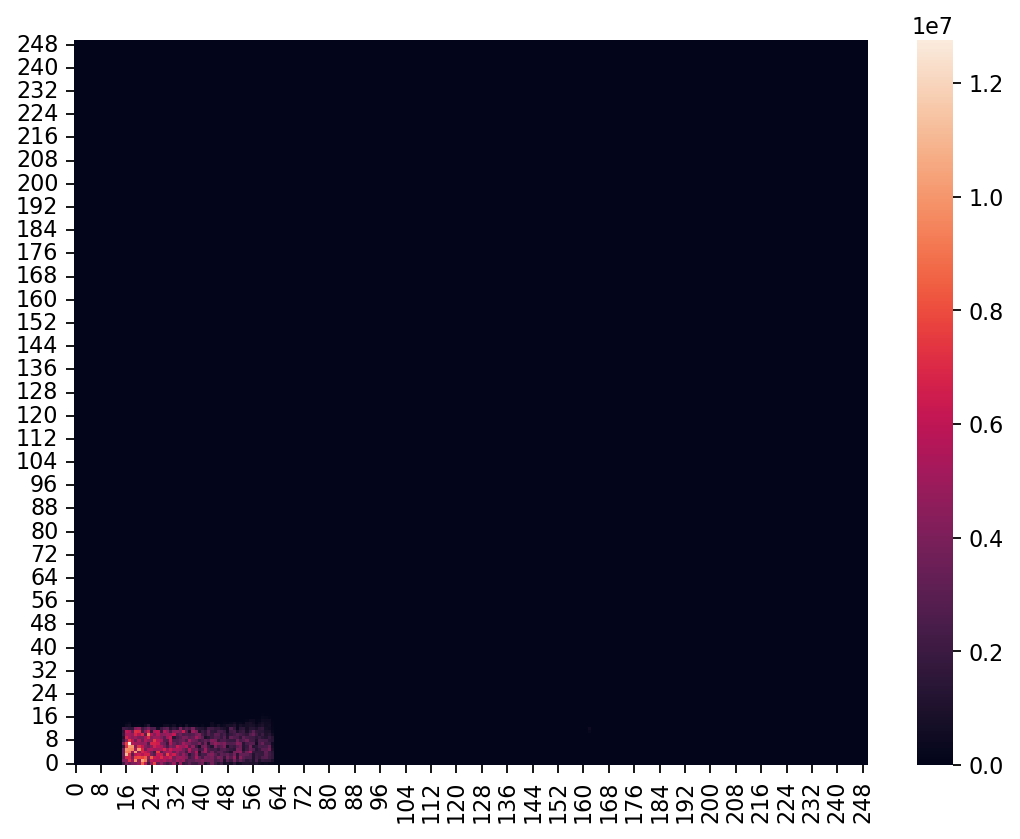

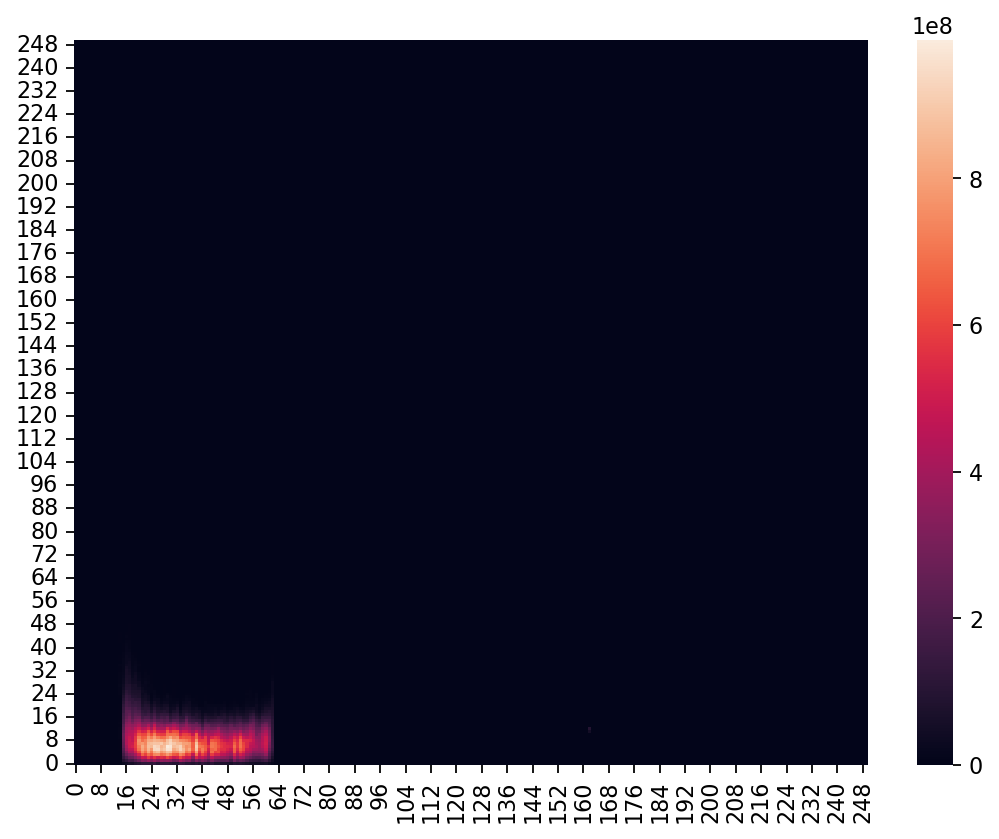

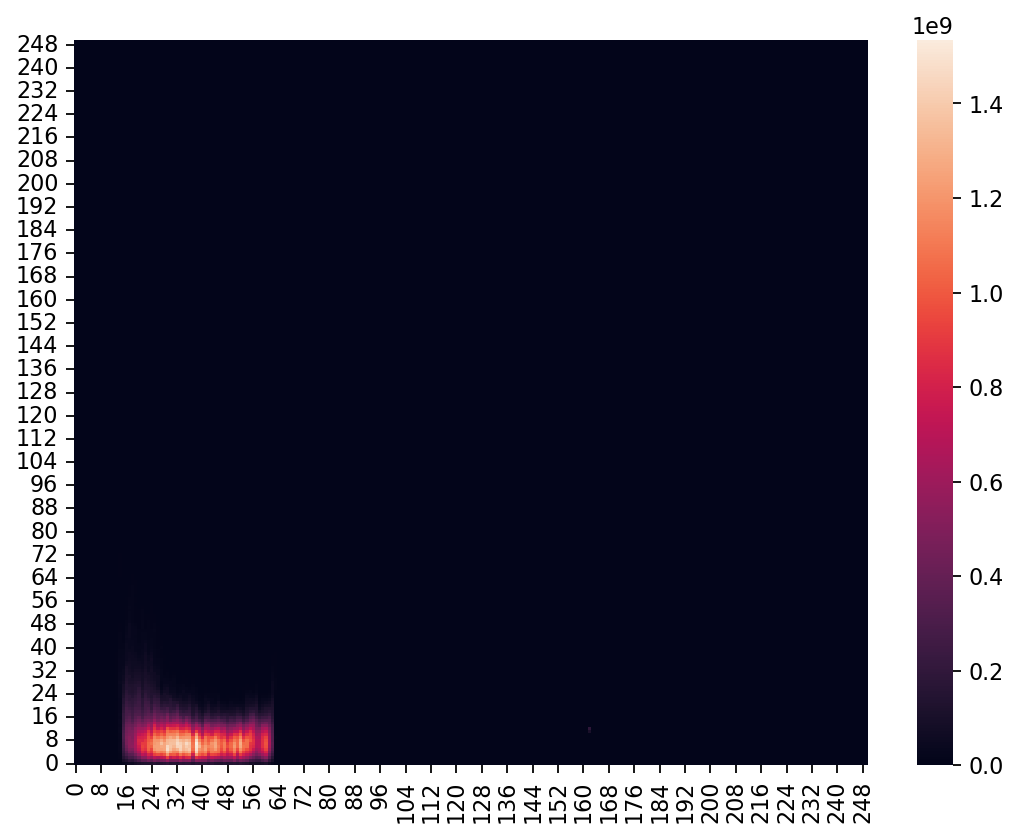

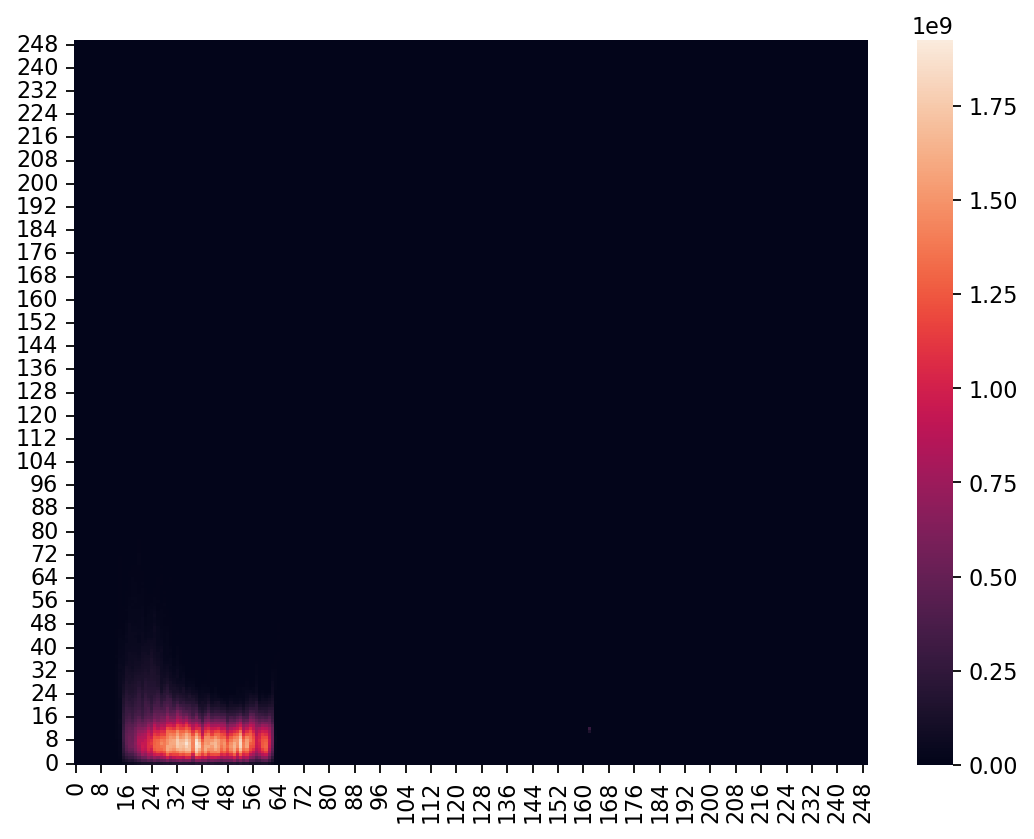

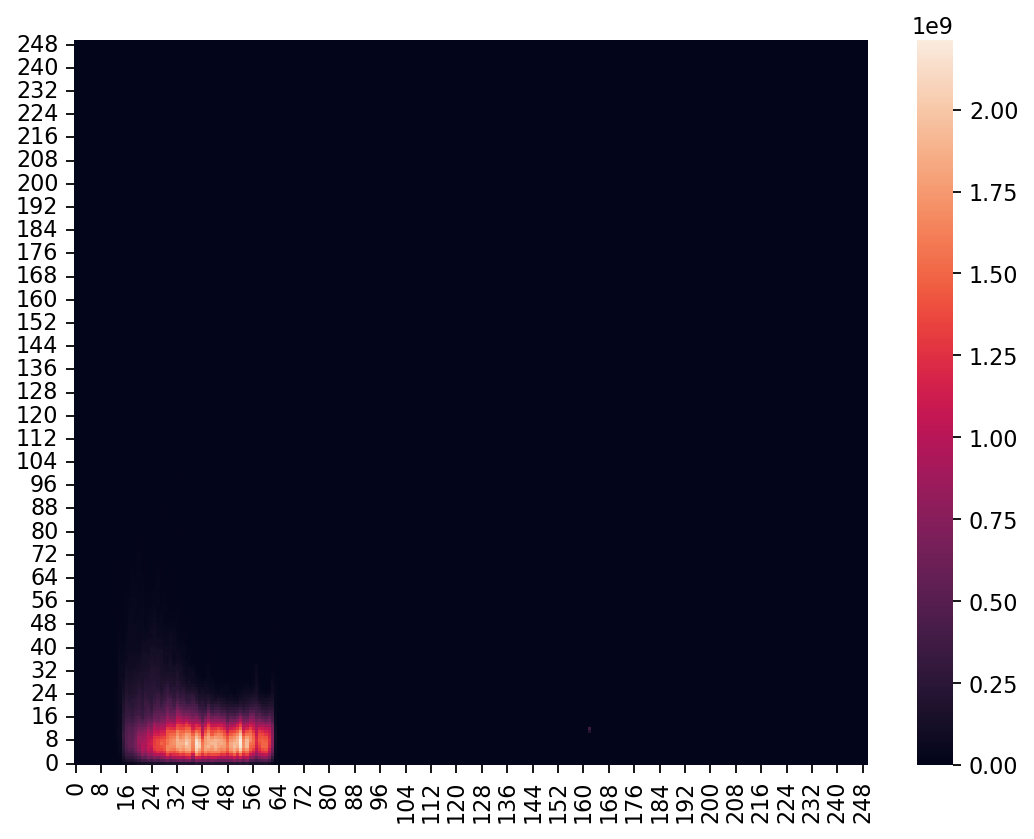

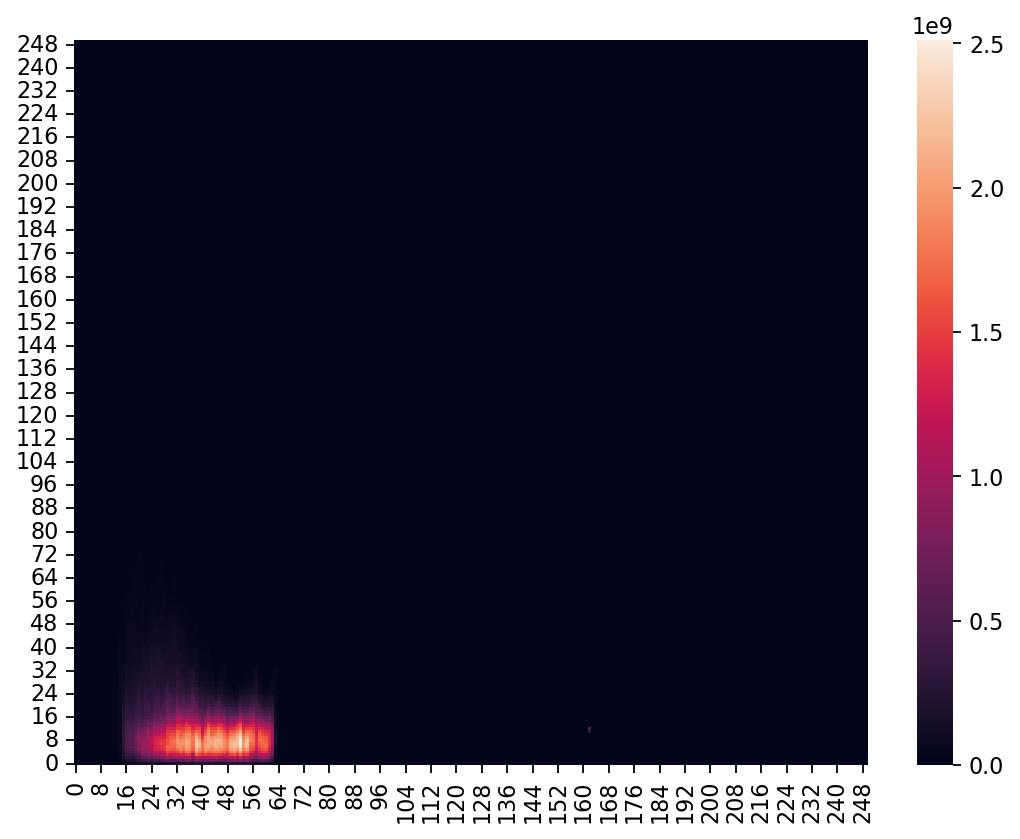

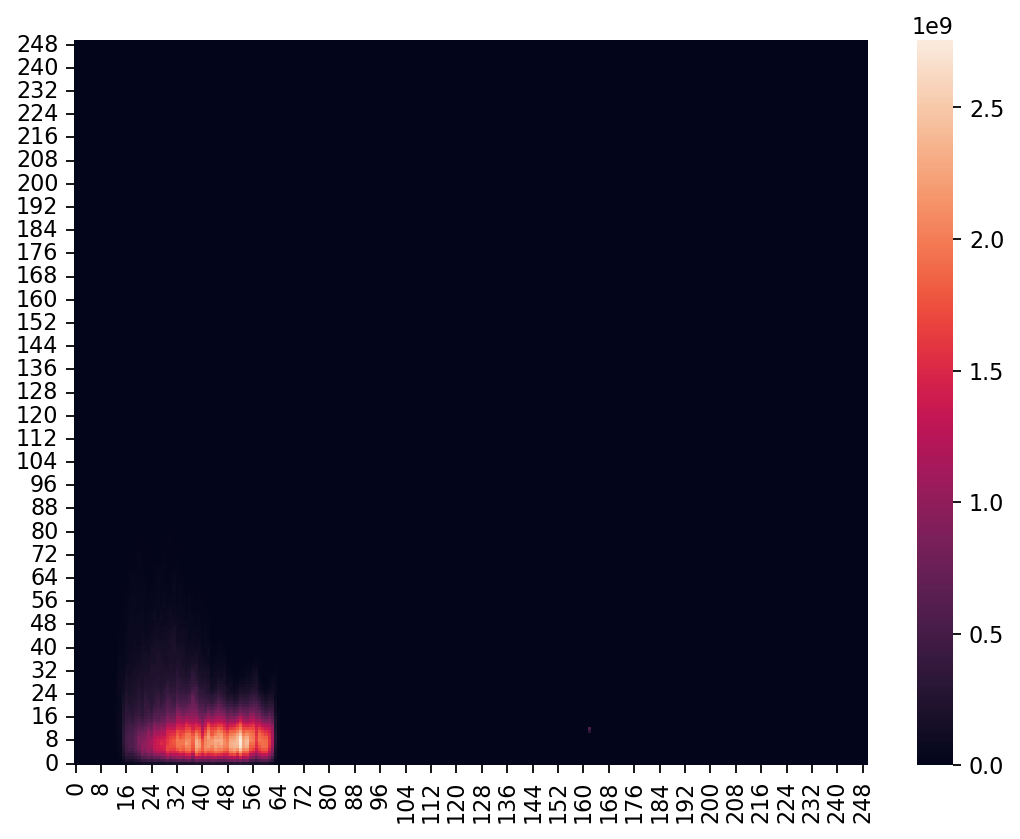

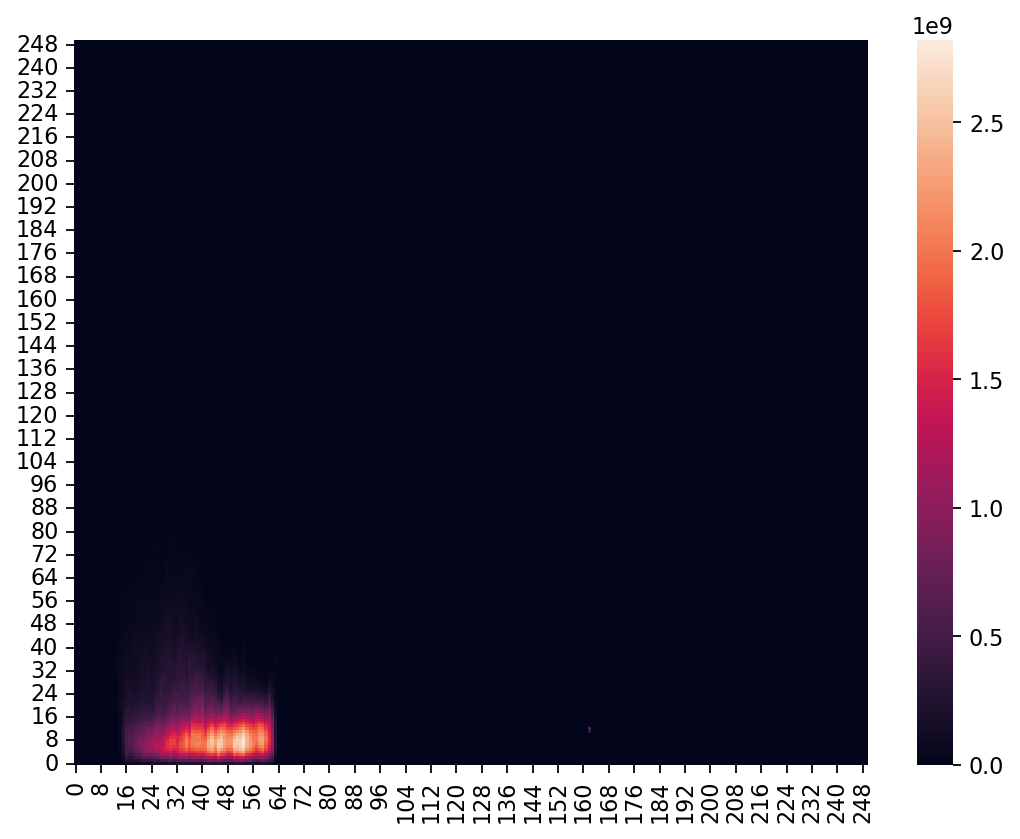

In [6]:
for step, figures_Count in enumerate(figures_Count_output):
    data = np.loadtxt(figures_Count)
    ae1 = data[0:250]
    plt.figure(figsize=(8, 6), dpi=80)
    ax = sns.heatmap(ae1)
    # ax.set_xlim(0,120)
    # ax.set_ylim(0,56)
    ax.invert_yaxis()
    plt.show()

In [118]:
df = pd.read_table(figures_aei_output[0], sep = ('\s+'), names = ['time', 'i', 'a', 'e', 'inc', 'Omega', 'w', 'Theta', 'E', 'M', 'm', 'r'])
sort = df.sort_values(by = ['a']).reset_index(drop=True)
sort


,time,i,a,e,inc,Omega,w,Theta,E,M,m,r
0,0,1565,0.500115,0.004759,0.082141,5.141923,1.977946,1.676200,1.671466,1.666731,2.669490e-09,0.000005
1,0,1517,0.500258,0.009232,0.074123,3.584892,0.010557,5.025775,5.034545,5.043301,3.199610e-09,0.000005
2,0,947,0.500513,0.004960,0.061960,5.465465,5.827616,2.368155,2.364684,2.361206,3.250950e-09,0.000005
3,0,2872,0.500522,0.049933,0.019881,3.835942,2.927943,1.177436,1.131734,1.086538,2.777510e-09,0.000005
4,0,1659,0.500541,0.041472,0.270534,4.897305,5.948651,5.849897,5.866994,5.883760,3.444770e-09,0.000005
...,...,...,...,...,...,...,...,...,...,...,...,...
2997,0,854,1.994680,0.034638,0.261835,5.097883,2.027091,4.928534,4.962248,4.995811,1.840390e-09,0.000004
2998,0,360,1.994916,0.019859,0.062022,5.275219,0.601755,2.581814,2.571178,2.560455,3.394380e-09,0.000005
2999,0,1959,1.998229,0.008495,0.023087,0.719726,3.604195,0.232812,0.230860,0.228916,2.411140e-09,0.000005
3000,0,1391,1.999257,0.020829,0.042783,4.244732,1.230464,2.355814,2.340969,2.326019,2.989220e-09,0.000005


In [1]:
def plot_aei_object(ax, object_index, size, color, data):
    object_data = data.loc[data.i == object_index]
    if len(object_data.index) != 0:
        e, a = float(object_data.e), float(object_data.a)
        a_x = np.linspace(0.3, 6., 100)
        aphelion, perihelion = a * (1 + e), a * (1 - e)
        eMassQ, eMassq = 1. - (aphelion / a_x), (perihelion / a_x) - 1.
        region_data = pd.DataFrame(data = {'a': a_x, 'e': eMassQ, 'e_': eMassq})
        ax = sns.lineplot(data = region_data, x = 'a', y = 'e', color = 'red', alpha = 0.3, zorder=10)
        ax = sns.lineplot(data = region_data, x = 'a', y = 'e_', color = 'red', alpha = 0.3, zorder=10)
        ax.scatter(object_data.a, object_data.e, s = size, c = color, zorder = 100)
        
def plot_aei_scatter(ax, sort, data):
    temp = data.copy()
    temp['i'] = temp['i'].replace(dict(zip(sort.i, sort.index)))
    return sns.scatterplot(data = temp, x = 'a', y = 'e', hue = 'i', size = 'm', palette = 'viridis', legend = False, zorder=15)
    
def plot_Carti_object(ax, object_index, size, color, data):
    object_data = data.loc[data.i == object_index]
    if len(object_data.index) != 0:
        ax.scatter(object_data.x, object_data.y, s = size, c = color, zorder = 1000)
        
def plot_Carti_scatter(ax, sort, data):
    temp = data.copy()
    temp['i'] = temp['i'].replace(dict(zip(sort.i, sort.index)))
    ax.scatter(temp.x, temp.y, s = 10e5 * temp.r, c = temp.i, cmap = 'viridis')

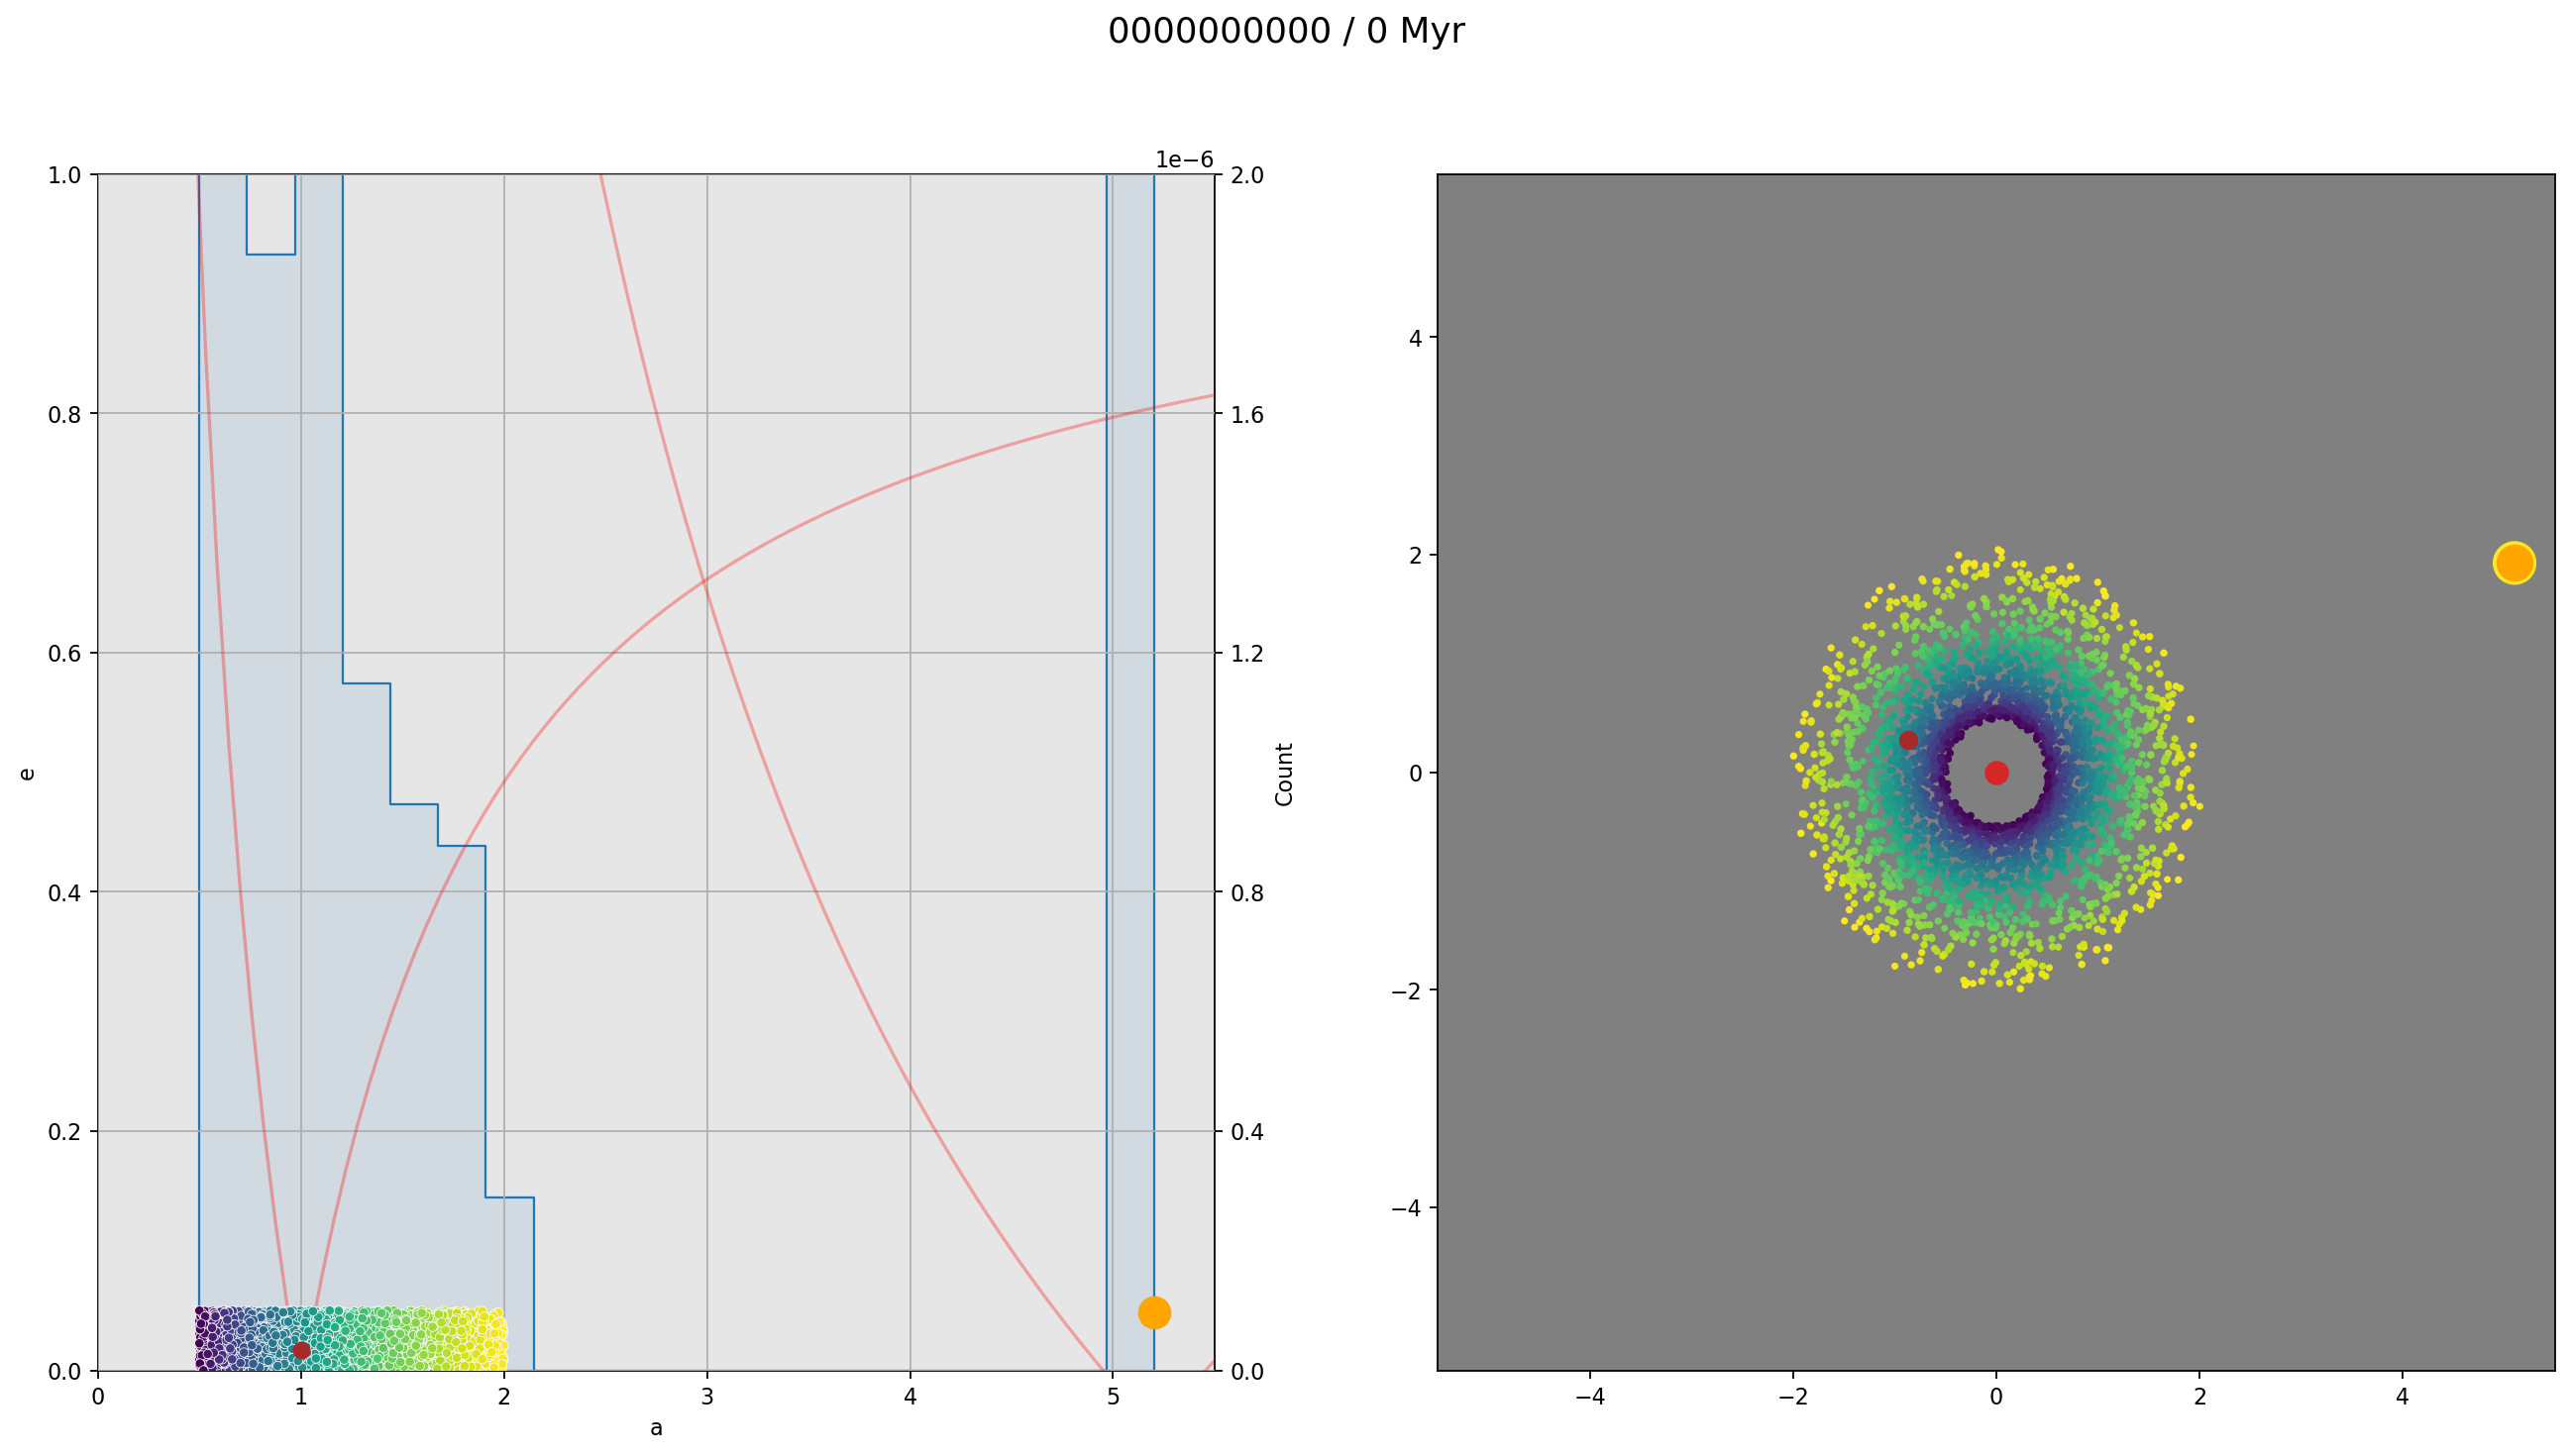

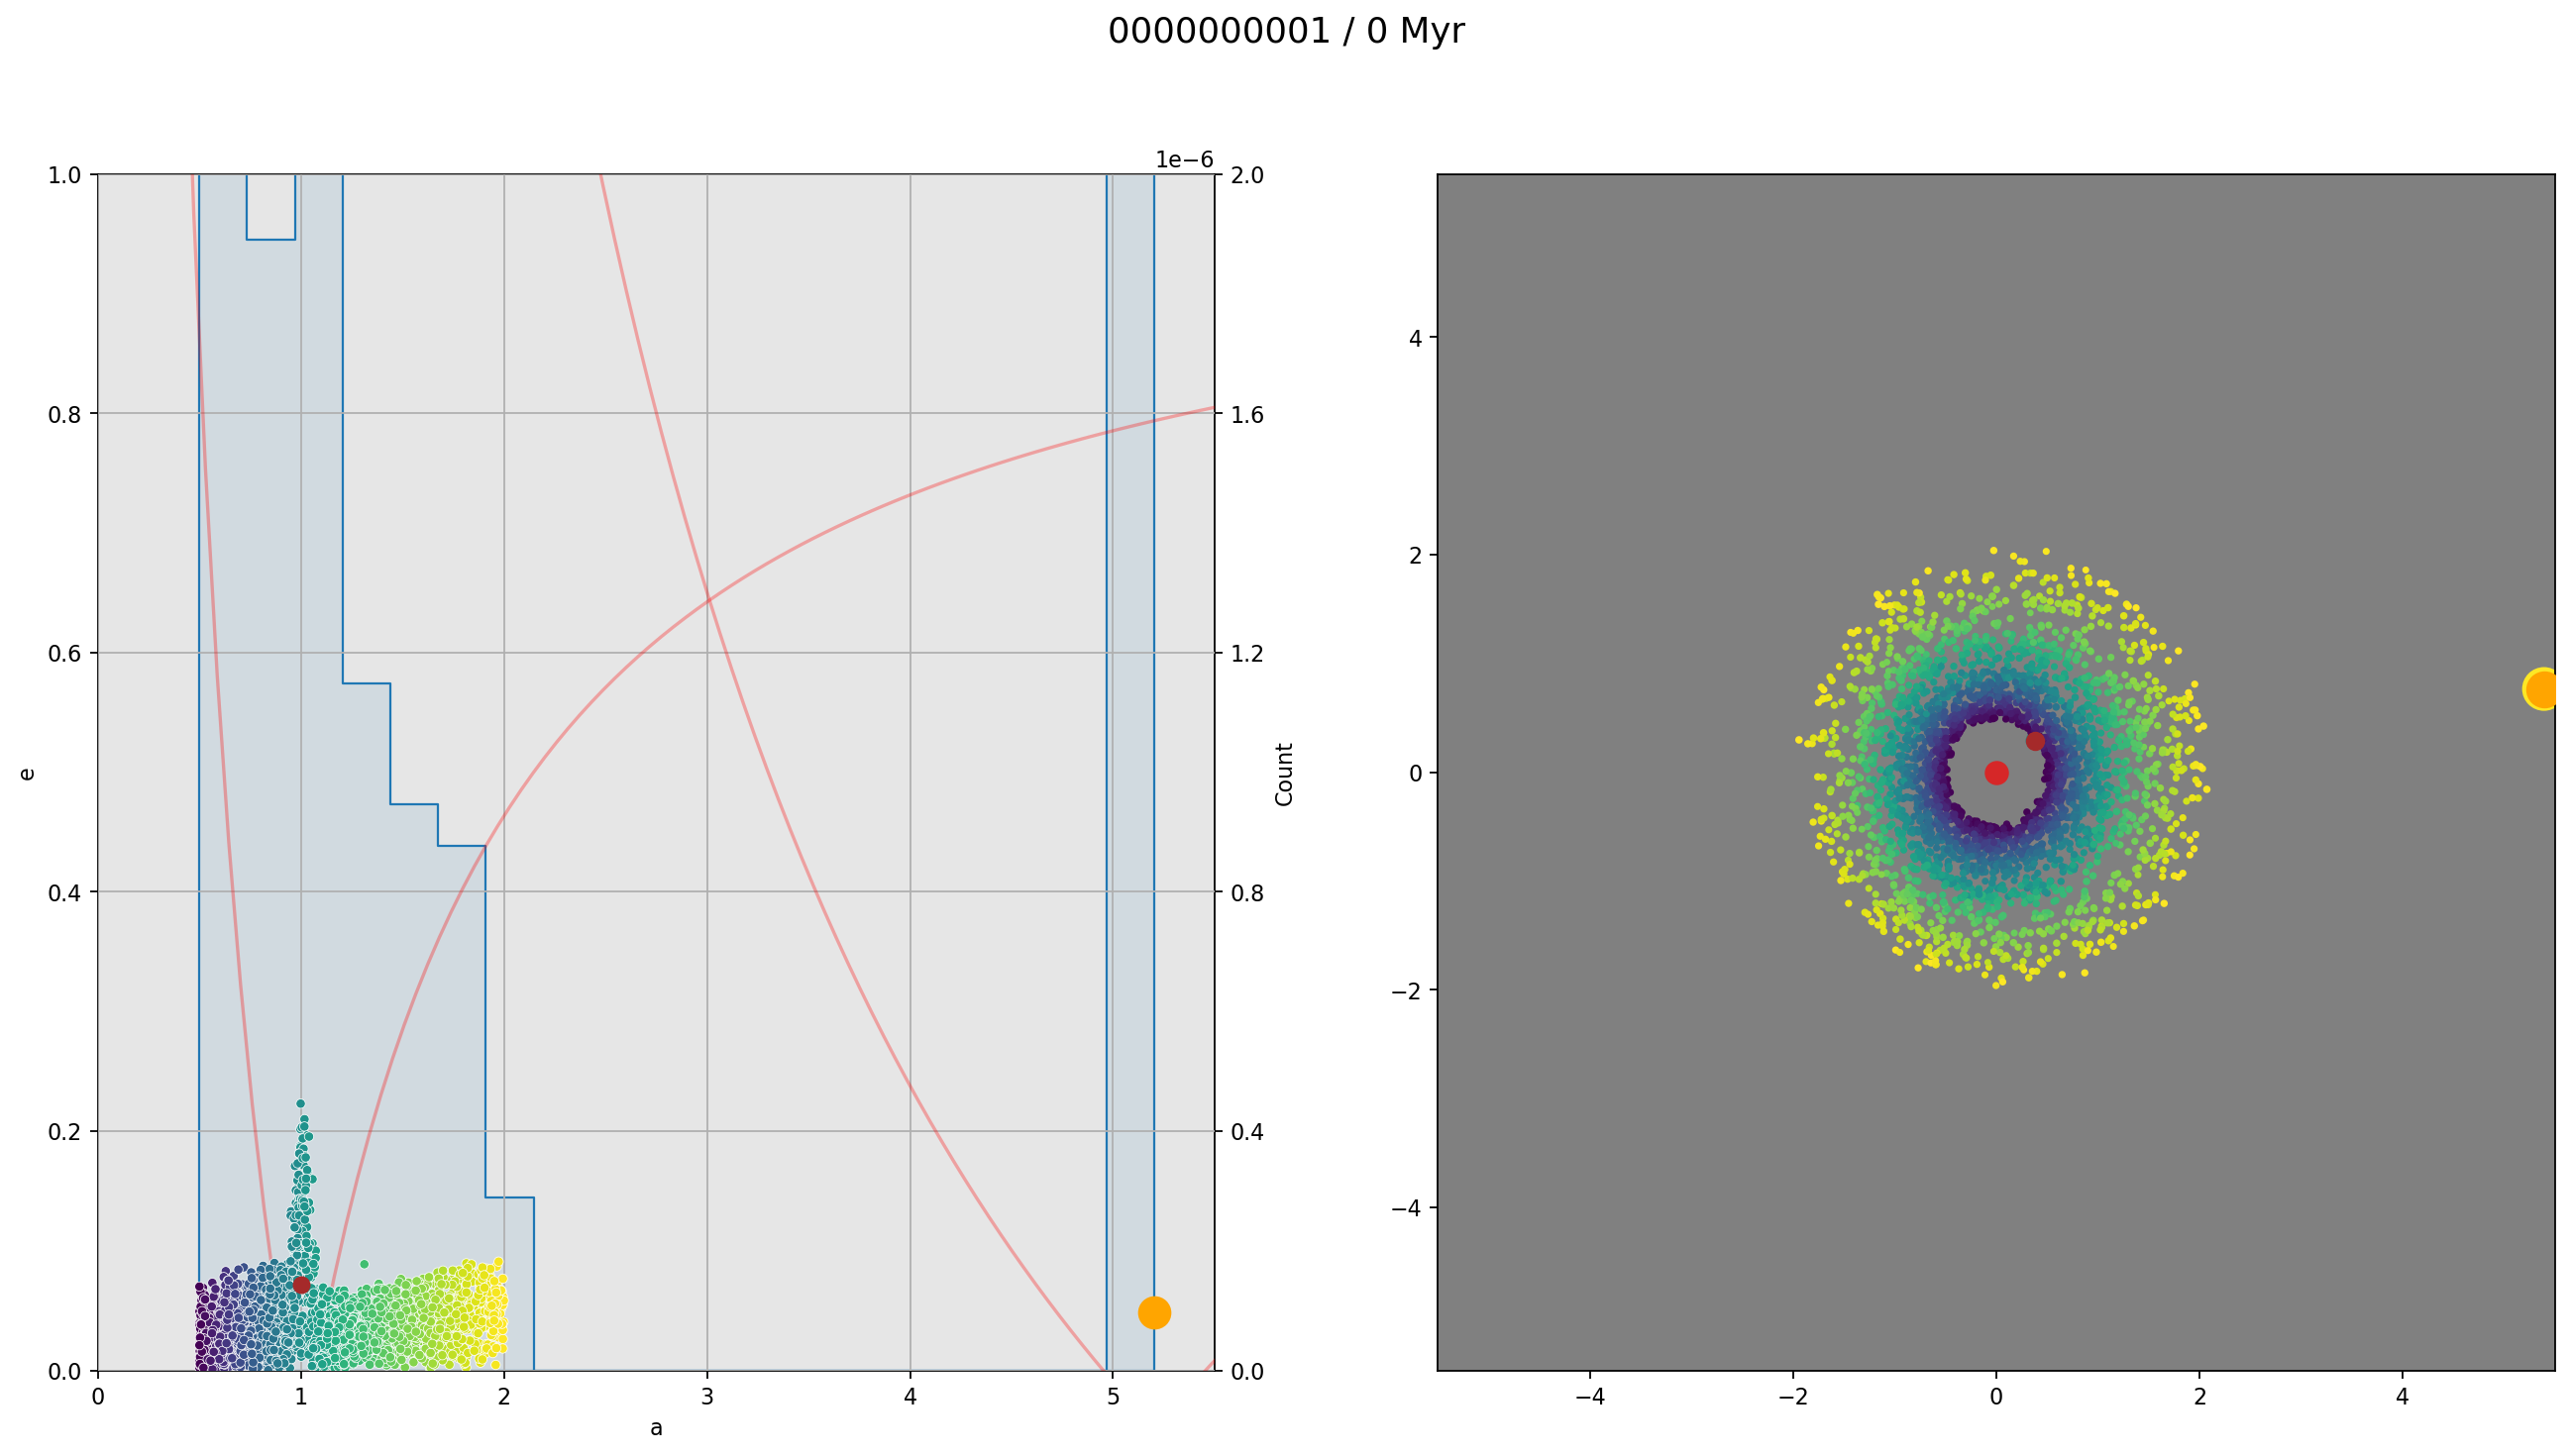

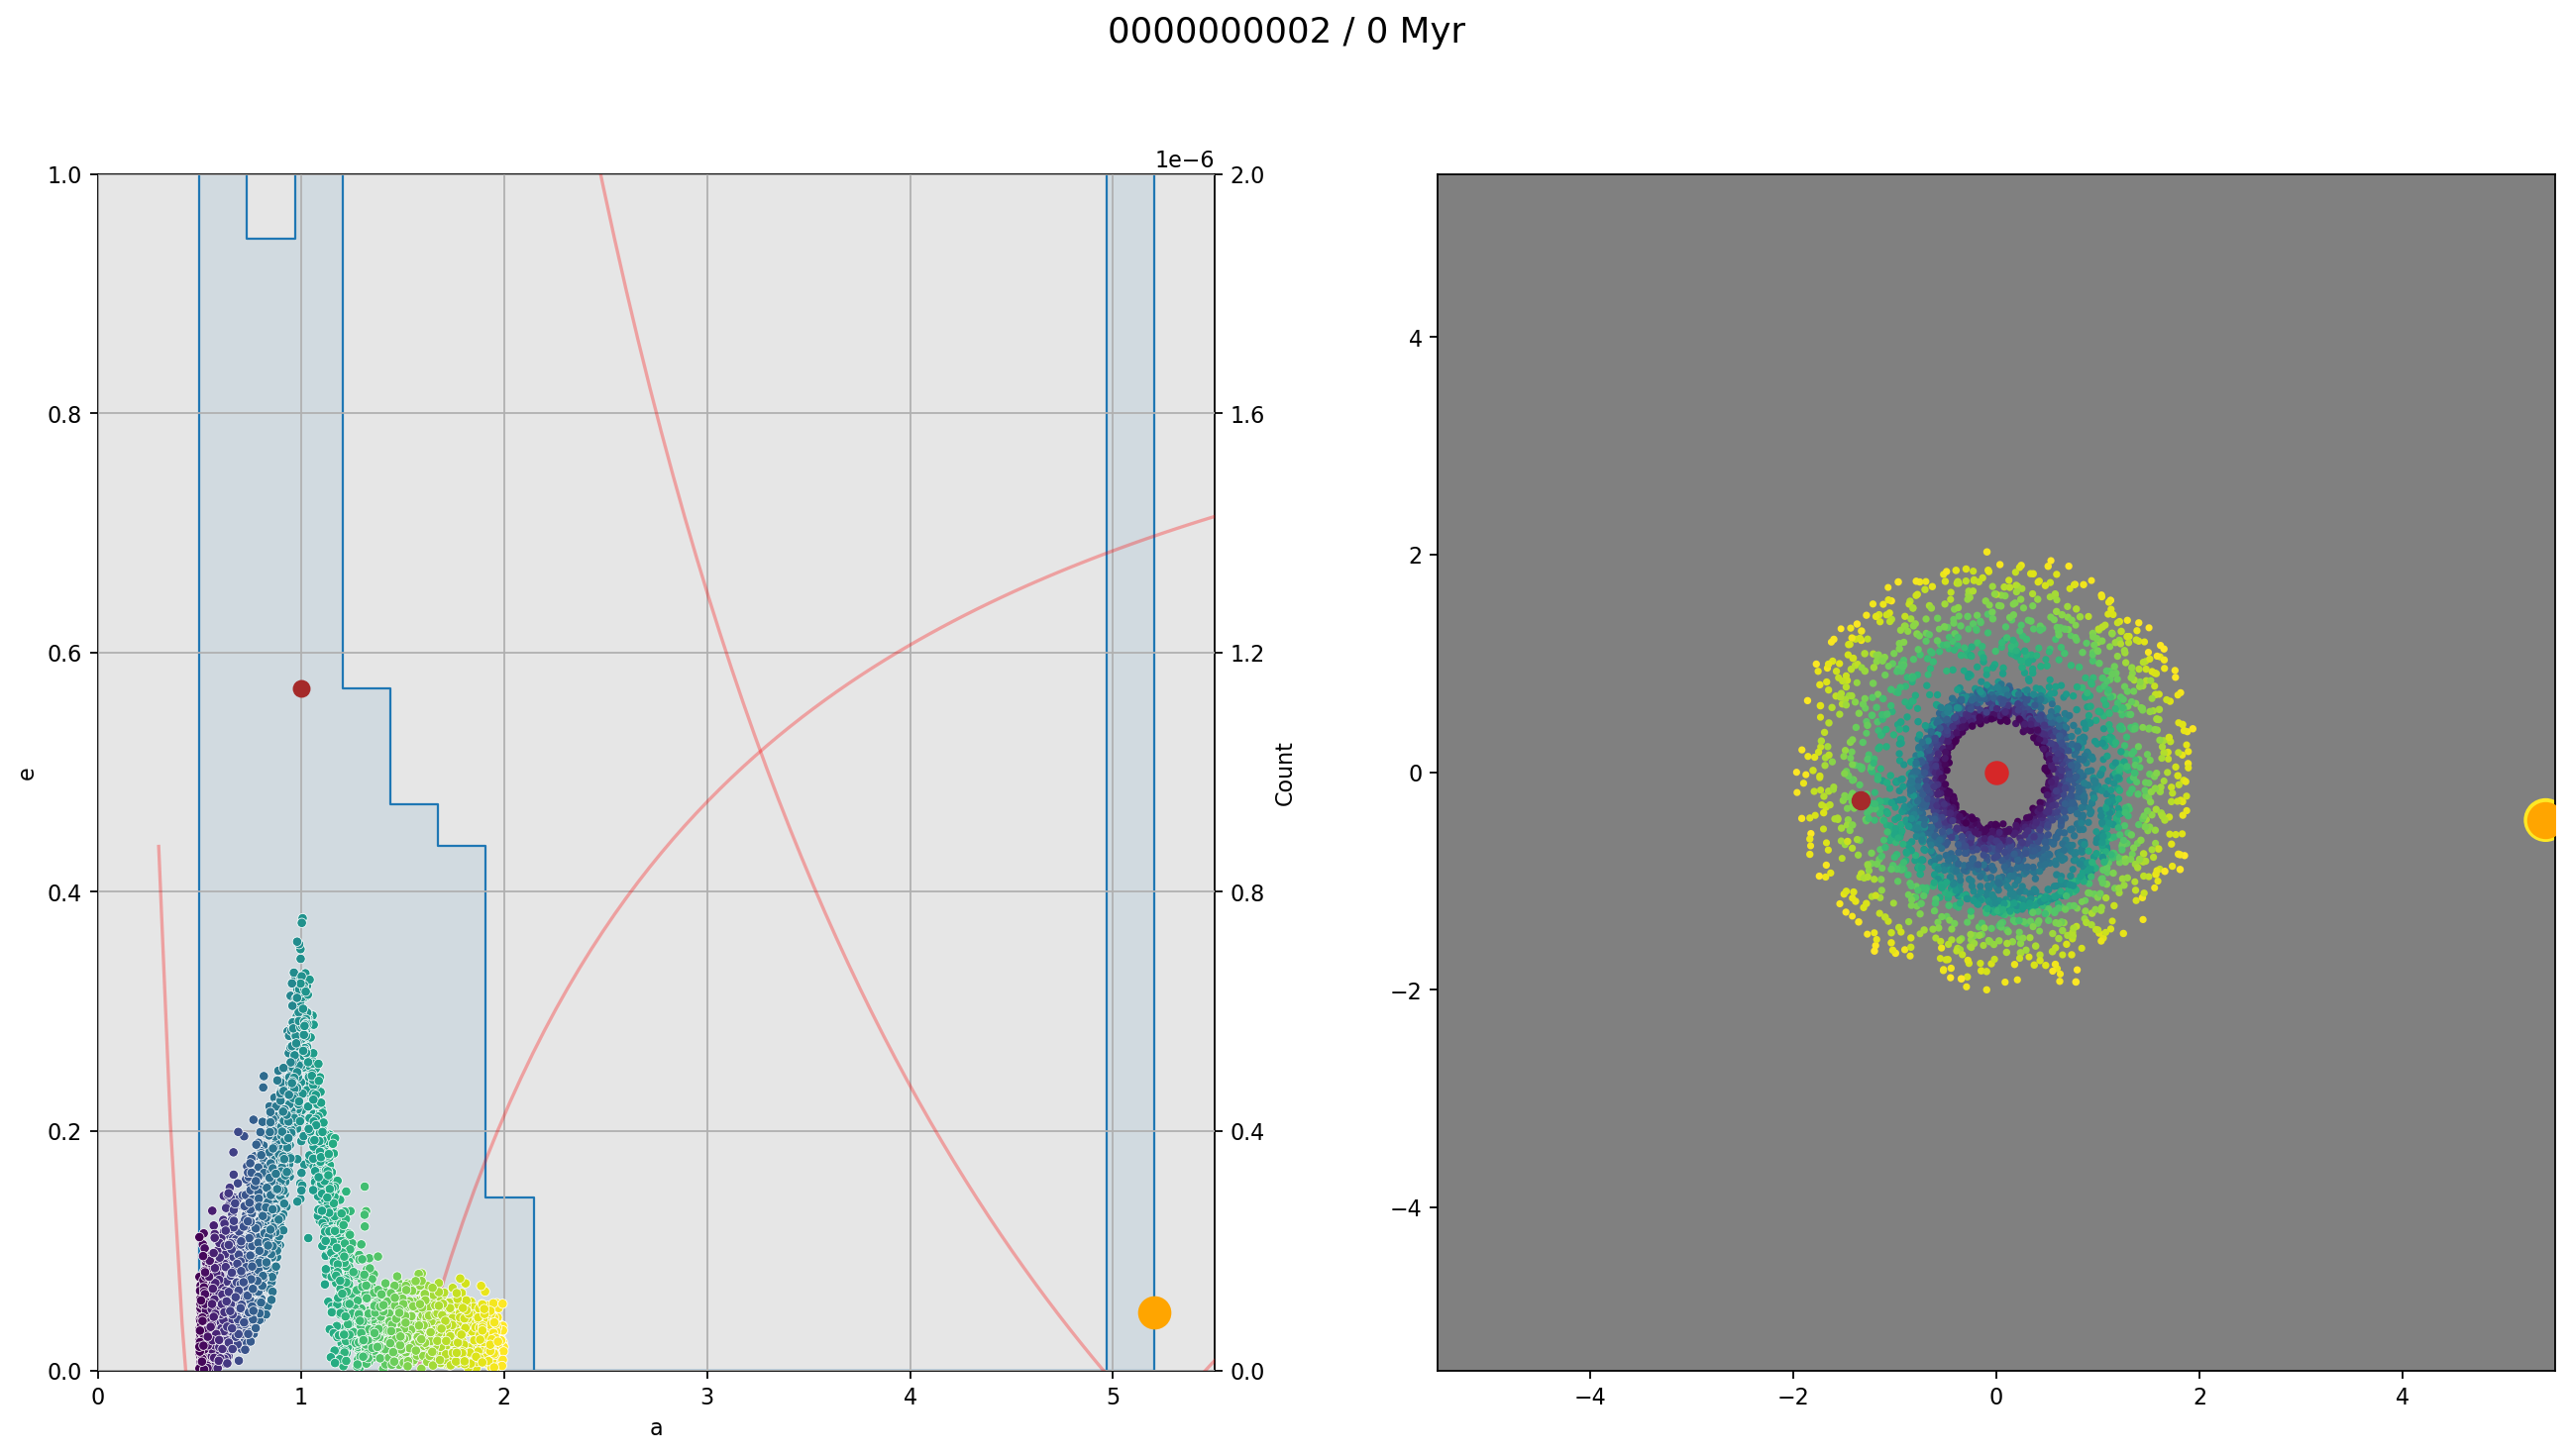

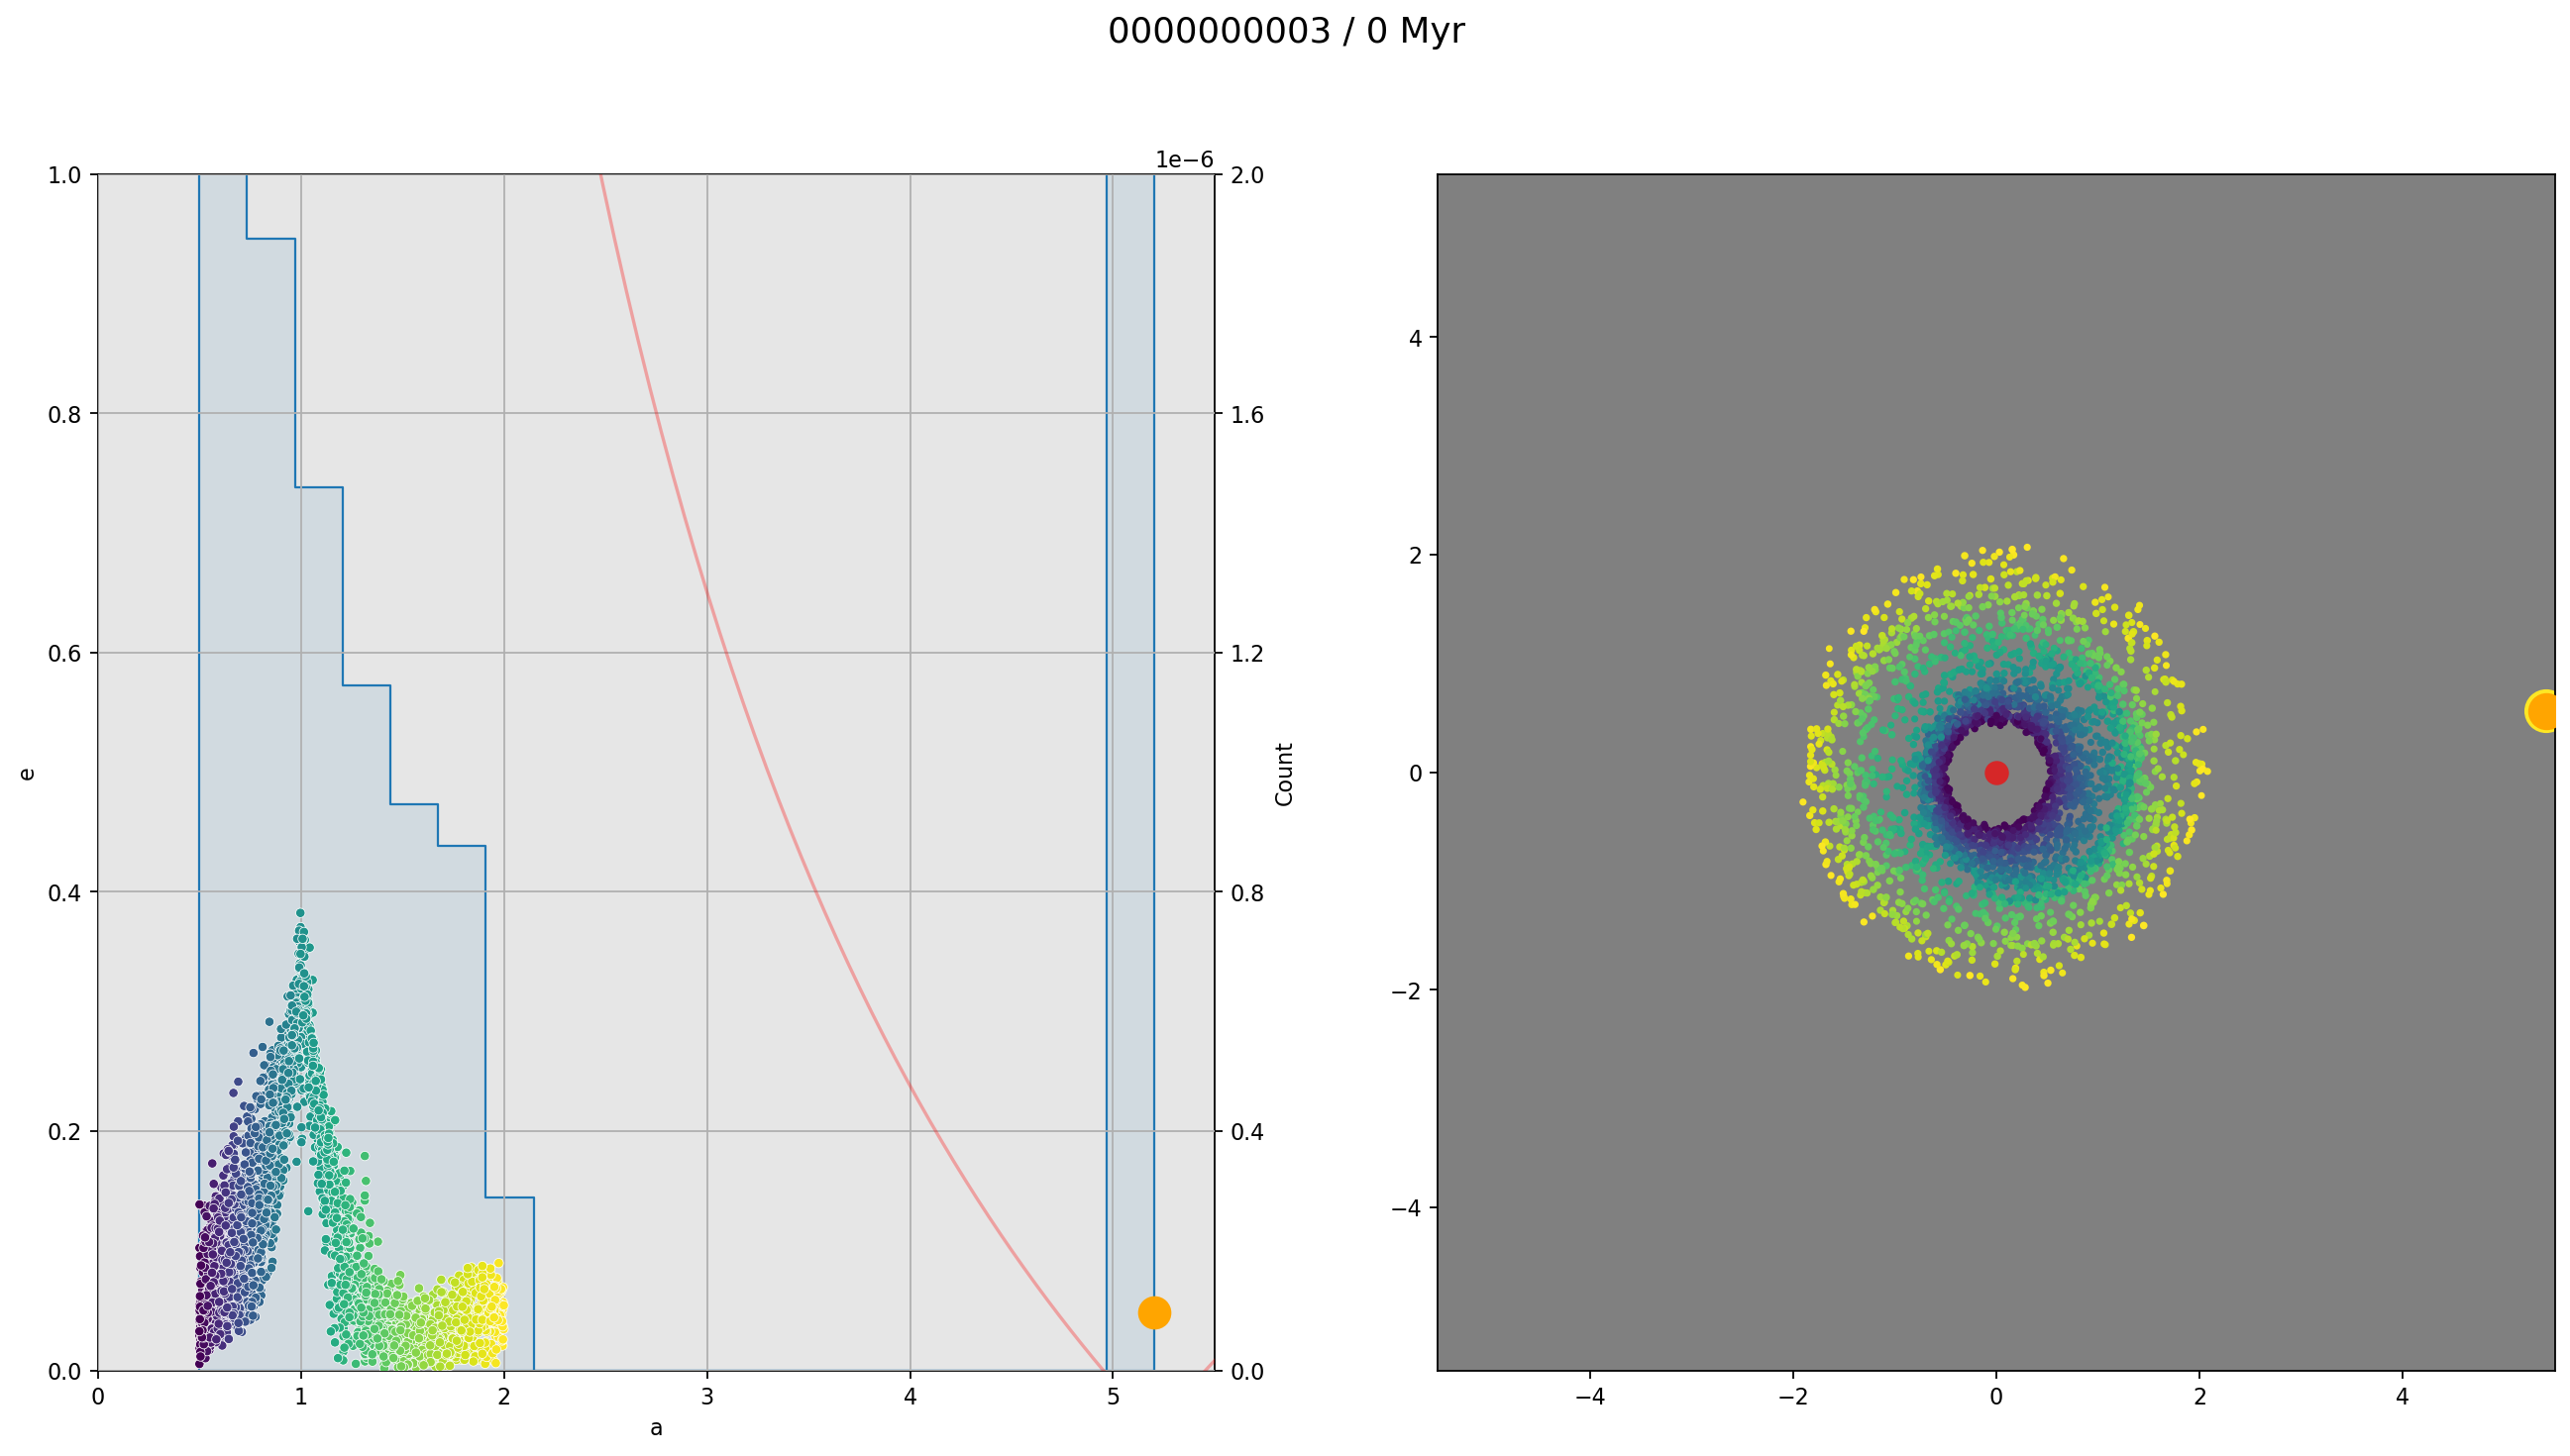

In [169]:
for step, (figure_aei, figure_Carti) in enumerate(zip(figures_aei_output, figures_Carti_output)):
    #extract dataset from file
    plot_aei = pd.read_table(figure_aei, sep = ('\s+'), names = ['time', 'i', 'a', 'e', 'inc', 'Omega', 'w', 'Theta', 'E', 'M', 'm', 'r'])
    plot_Carti = pd.read_table(figure_Carti, sep = ('\s+'), names = ['time', 'i', 'm', 'r', 'x', 'y', 'z', 'vx', 'vy', 'vz', 'Sx', 'Sy', 'Sz', 'amin', 'amax', 'emin', 'emax', 'aecount', 'aecountT', 'enccountT', 'test'])
    
    #locate the heavyiest objects for perhilion and aphelion line plot
    max_mass = plot_aei.loc[plot_aei.m == max(plot_aei.m)]
    # print(max_mass)
    
    #title and time series
    title = str(step).zfill(10)
    time = str(int(plot_aei.time[0] / 1000000.))
    
    #plotting config
    fig = plt.figure(figsize = (20, 10), dpi = 80)
    fig.suptitle(title + ' / ' + time + ' Myr', fontsize = 16)
    
    #plots
    #Left plot
    ax = fig.add_subplot(121)
    ax.set_xlim(0, 5.5)
    ax.set_ylim(0, 1.)
    ax.set_zorder(1)
    ax.set_frame_on(False)
    ax.grid(True)
    plot_aei_object(ax, 1, 50, 'brown', plot_aei)
    plot_aei_object(ax, 0, 200, 'orange', plot_aei)
    ax = plot_aei_scatter(ax, sort, plot_aei)
    
    ax2 = ax.twinx()
    ax2.axvspan(0, 6, facecolor="#e6e6e6")
    ax2 = sns.histplot(data = plot_aei, x = 'a', alpha = 0.1, weights = 'm', element = 'step', bins = 20)
    ax2.set_yticks(np.arange(0, 2.2e-6, 4.0e-7))
    ax2.set_ylim(0, 2.0e-6)
    ax2.set_zorder(0)
        
    #Right plot
    ax4 = fig.add_subplot(122)
    ax4.set_xlim(-5.5, 5.5)
    ax4.set_ylim(-5.5, 5.5)
    plot_Carti_scatter(ax4, sort, plot_Carti)
    plot_Carti_object(ax4, 0, 250, 'orange', plot_Carti)
    plot_Carti_object(ax4, 1, 60, 'brown', plot_Carti)
    ax4.scatter(0, 0, s = 100, c = 'tab:red')
    # ax4.scatter(Earth_Carti.x, Earth_Carti.y, s = 100, c = 'brown', zorder = 100)
    ax4.grid(False)
    ax4.set_facecolor('gray')
    fig_name = f'/figs/{title}.png'
    
    plt.show()
    # plt.savefig(local+fig_name, dpi=300)
    plt.close()

In [20]:
image_folder = 'figs'
video_name = 'ae_giants.mp4'

images = [img for img in sorted(os.listdir(image_folder)) if img.endswith(".png")]
frame = cv2.imread(os.path.join(image_folder, images[0]))
height, width, layers = frame.shape

fourcc = cv2.VideoWriter_fourcc(*'mp4v')
video = cv2.VideoWriter(video_name, fourcc, 20, (width,height))

for image in images:
    video.write(cv2.imread(os.path.join(image_folder, image)))

cv2.destroyAllWindows()
video.release()
        

In [162]:
print(plot_Carti)

              time     i             m         r         x         y  \
0     89938.398357  3001  9.551098e-04  0.000356  5.415458  0.560514   
1     89938.398357  1220  3.033035e-09  0.000005  0.043392 -0.957841   
2     89938.398357  1608  2.947158e-09  0.000005  1.295644  0.037167   
3     89938.398357  1452  2.647591e-09  0.000005  0.992619 -0.719781   
4     89938.398357  2324  3.083188e-09  0.000005 -1.414574 -0.135698   
...            ...   ...           ...       ...       ...       ...   
2996  89938.398357   201  3.356406e-09  0.000005  0.347755  0.404028   
2997  89938.398357  2077  3.312077e-09  0.000005 -0.890594 -0.874789   
2998  89938.398357  2646  3.436461e-09  0.000005  1.475481  0.937501   
2999  89938.398357  2089  2.668624e-09  0.000005  0.177249  1.318372   
3000  89938.398357  2323  2.591878e-09  0.000005  1.008696  1.051554   

             z        vx        vy        vz  ...  Sy  Sz  amin  amax  emin  \
0    -0.119711 -0.037735  0.416913 -0.000702  ...   0   